In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
patients_df = pd.read_csv('data/adhd_data.csv')
patients_df[::]

,subject_id,gender,hallucinations,ocd,icustay_id,drug
0,303,M,False,False,NaN,NaN
1,715,F,False,True,NaN,DiphenhydrAMINE
2,1590,M,False,False,NaN,NaN
3,2945,F,True,True,NaN,Olanzapine
5,2170,M,False,False,NaN,NaN
...,...,...,...,...,...,...
137,94075,M,False,False,NaN,NaN
138,97974,F,False,False,NaN,NaN
139,96463,M,True,False,285758.0,Propofol
140,98177,M,False,False,NaN,NaN


Hallucinations: 15
OCD: 5
ADHD Only: 106


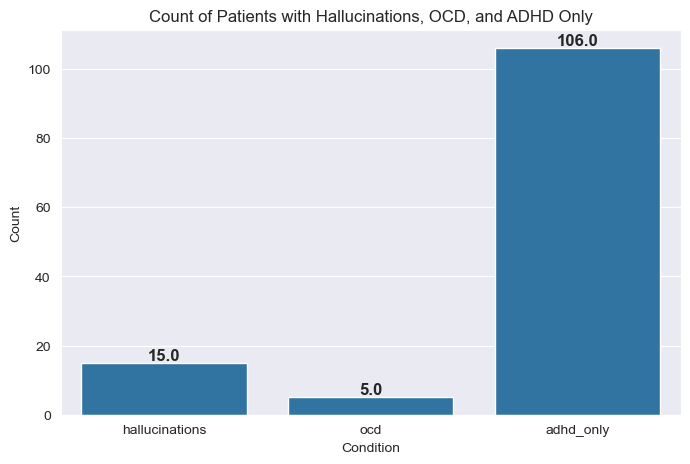

In [93]:
# Get all patients whose notes contain the word "hallucinations"
hallucinations_df = patients_df[patients_df["hallucinations"] == True]
ocd_df = patients_df[patients_df["ocd"] == True]
adhd_only_df = patients_df[patients_df["hallucinations"] == False]
#adhd_only_df = adhd_only_df[adhd_only_df["ocd"] == False]

print(f"Hallucinations: {len(hallucinations_df)}")
print(f"OCD: {len(ocd_df)}")
print(f"ADHD Only: {len(adhd_only_df)}")

data = {"hallucinations": len(hallucinations_df), "ocd": len(ocd_df), "adhd_only": len(adhd_only_df)}

# Convert dictionary to a DataFrame for plotting
df_plot = pd.DataFrame(list(data.items()), columns=["Condition", "Count"])

# Plot the bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Condition", y="Count", data=df_plot)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Count of Patients with Hallucinations, OCD, and ADHD Only")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()

In [94]:
patients_df[::]

,subject_id,gender,hallucinations,ocd,icustay_id,drug
0,303,M,False,False,NaN,NaN
1,715,F,False,True,NaN,DiphenhydrAMINE
2,1590,M,False,False,NaN,NaN
3,2945,F,True,True,NaN,Olanzapine
5,2170,M,False,False,NaN,NaN
...,...,...,...,...,...,...
137,94075,M,False,False,NaN,NaN
138,97974,F,False,False,NaN,NaN
139,96463,M,True,False,285758.0,Propofol
140,98177,M,False,False,NaN,NaN


13 | 2 | 0 | 5 | 68 | 38


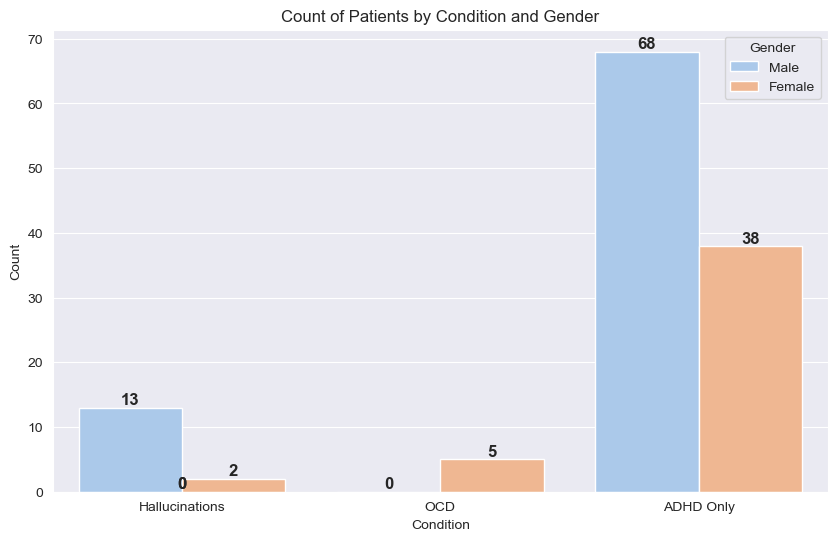

In [95]:
h_male= hallucinations_df[hallucinations_df["gender"] == "M"]
h_female= hallucinations_df[hallucinations_df["gender"] == "F"]

o_male = ocd_df[ocd_df["gender"] == "M"]
o_female = ocd_df[ocd_df["gender"] == "F"]

a_male = adhd_only_df[adhd_only_df["gender"] == "M"]
a_female = adhd_only_df[adhd_only_df["gender"] == "F"]


# Data for plotting
data_gender_split = {
    "Condition": ["Hallucinations", "Hallucinations", "OCD", "OCD", "ADHD Only", "ADHD Only"],
    "Gender": ["Male", "Female", "Male", "Female", "Male", "Female"],
    "Count": [len(h_male), len(h_female), len(o_male), len(o_female), len(a_male), len(a_female)]
}

print(f"{len(h_male)} | {len(h_female)} | {len(o_male)} | {len(o_female)} | {len(a_male)} | {len(a_female)}")

# Convert to DataFrame
df_plot = pd.DataFrame(data_gender_split)

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Condition", y="Count", hue="Gender", data=df_plot, palette="pastel")

# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title("Count of Patients by Condition and Gender")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()


In [ ]:
# TODO: Do some DL/ML on this data